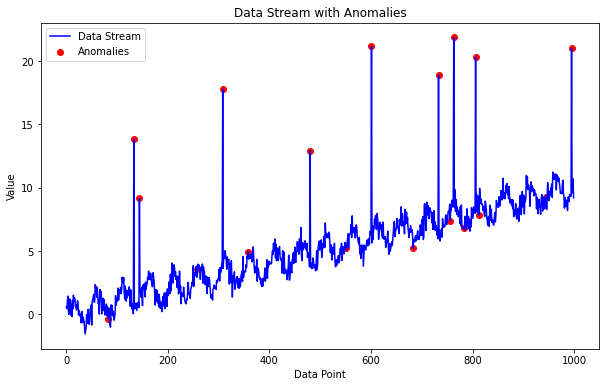

In [3]:
import numpy as np
import random
from statsmodels.tsa.seasonal import STL
import pandas as pd
import matplotlib.pyplot as plt

def generate_data_stream(length=1000, seasonality_period=50, anomaly_chance=0.01):
    base_pattern = np.linspace(0, 10, length)
    # Seasonal component
    seasonal_pattern = np.sin(np.linspace(0, 2 * np.pi, seasonality_period))
    seasonal_component = np.tile(seasonal_pattern, length // seasonality_period + 1)[:length]
    # Random noise
    noise = np.random.normal(0, 0.5, length)
    # Data stream with seasonality and noise
    data_stream = base_pattern + seasonal_component + noise
    # Introduce anomalies
    for i in range(length):
        if random.random() < anomaly_chance:
            data_stream[i] += np.random.normal(15, 5)

    return data_stream

data_stream = generate_data_stream()

def detect_anomalies(data_stream, seasonality_period=50, z_score_threshold=3.0):
    # STL Decomposition
    stl = STL(pd.Series(data_stream), period=seasonality_period)
    result = stl.fit()
    # Residuals (removing trend and seasonality)
    residuals = result.resid
    # Calculate Z-scores
    z_scores = np.abs((residuals - np.mean(residuals)) / np.std(residuals))
    # Identify anomalies
    anomalies = np.where(z_scores > z_score_threshold)[0]
    return anomalies

anomalies = detect_anomalies(data_stream)
def plot_data_with_anomalies(data_stream, anomalies):

    plt.figure(figsize=(10, 6))
    plt.plot(data_stream, label='Data Stream', color='blue')

    #anomalies
    if len(anomalies) > 0:
        plt.scatter(anomalies, data_stream[anomalies], color='red', label='Anomalies')

    plt.title('Data Stream with Anomalies')
    plt.xlabel('Data Point')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_data_with_anomalies(data_stream, anomalies)

